In [2]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [3]:
digi=load_digits()
digi.data.shape

(1797, 64)

In [6]:
digi.images.shape

(1797, 8, 8)

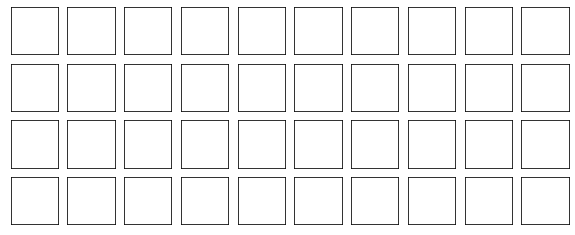

In [7]:
fig,axes = plt.subplots(4,10,figsize=(10,4)
                           ,subplot_kw = {"xticks":[],"yticks":[]}
                           )

In [8]:
enumerate(axes.flat)

In [11]:
def plot_digi(data):
    #data结构必须是(m,n) ,且n要可以转化为(8,8)
    fig,axes = plt.subplots(4,10,figsize=(10,4)
                           ,subplot_kw = {"xticks":[],"yticks":[]}
                           )
    for i,ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap="binary")

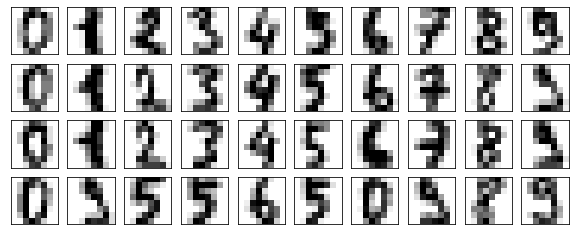

In [12]:
plot_digi(digi.data)

In [13]:
np.random.RandomState(42)

RandomState(MT19937) at 0x12D47C8

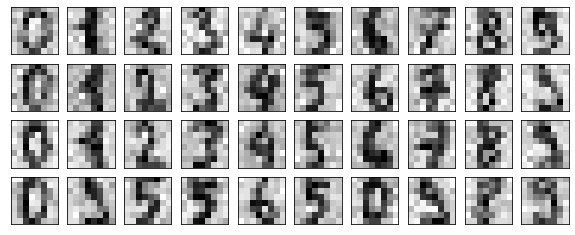

In [14]:
#在指定的数据集中，随机抽取服从正态分布的数据
#两个参数，分别是指定的数据集，和抽取出来的正太分布的方差
noisy = np.random.normal(digi.data,2)
plot_digi(noisy)

In [15]:
pca = PCA(0.5,svd_solver="full").fit(noisy)
x_dr = pca.transform(noisy)

In [16]:
x_dr.shape

(1797, 6)

In [23]:
v=pca.components_
v.shape

(6, 64)

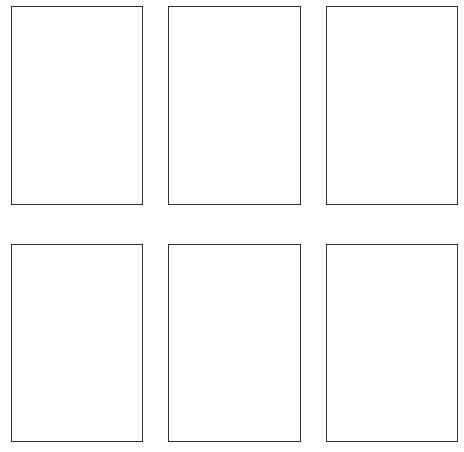

In [29]:
fig,axes = plt.subplots(2,3,figsize=(8,8)
                        ,subplot_kw = {"xticks":[],"yticks":[]}
                        )

In [30]:
for i, ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(8,8),cmap="gray") #reshape成(62x47)的图像 
#可视化新特征空间V  ("骨架")

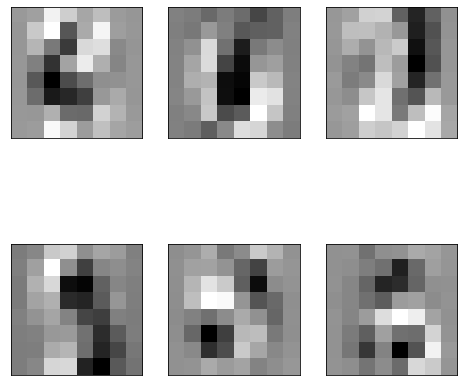

In [31]:
fig

In [34]:
#逆转降维结果，实现降噪
without_noisy = pca.inverse_transform(x_dr)
without_noisy.shape
# 6 恢复为 64

(1797, 64)

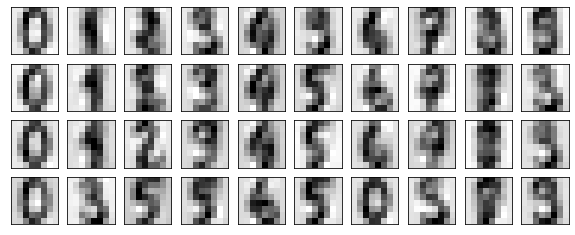

In [35]:
plot_digi(without_noisy)